<a href="https://colab.research.google.com/github/memehabel/Habel-Portfolio/blob/main/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Analysis

Kenneth Alexis, Meme Habel, and Sam Moushey


# Import Data and Packages

In [45]:
import pandas as pd
import numpy as np

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
# Set the directory where the images are stored
dir = '/content/gdrive/MyDrive/IS 8036 Final Project'      #/content/drive/My Drive/MLCourse/Airbnb

#Pass your own folder path here
#Dwonload the csv "Airbnb_Listings.csv" from Kaggle and save it to your Google Drive directory
#Here it is saved in the ../MLcourse folder.
## Make sure to adjust other paths in this code accordingly
listing_data=pd.read_csv(dir+'/Airbnb_Listings.csv')
listing_data.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


# Data Preparation

In [48]:
print(listing_data.shape)
for col in listing_data.columns:
  print (col)

(7221, 106)
id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_night

In [49]:
# Remove trailing spaces from all string columns
listing_data = listing_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [50]:
# Capitalize each word in the 'city' column
listing_data['city'] = listing_data['city'].str.title()

In [51]:
# Translate cities listed in Chinese
listing_data = listing_data.replace({'圣何塞' : 'San Jose', '洛斯阿尔托斯' : 'Los Altos'})

In [52]:
# Fix entry with county name in the city column
listing_data['city'] = listing_data['city'].replace('Santa Clara County', 'Campbell')

In [53]:
# Convert 'price' colummn

# Determine data type of 'price' column
listing_data['price'].dtypes

# First, convert the 'price' from object to string
listing_data['price'] = listing_data['price'].astype(str)


# Remove symbols
listing_data['price'] = listing_data['price'].str.replace('$', '')
listing_data['price'] = listing_data['price'].str.replace('.00', '')
listing_data['price'] = listing_data['price'].str.replace(',', '')
listing_data['price'].head(50)

# Convert 'price' column to numeric data type
listing_data['price'] = pd.to_numeric(listing_data['price'], errors='coerce')


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Drop useless columns
drop_columns = ['license', 'neighbourhood_group_cleansed', 'has_availability',
                'requires_license', 'is_business_travel_ready', 'xl_picture_url',
                'experiences_offered']
data = listing_data.drop(columns=drop_columns)

# Convert categorical variables to dummy variables
categorical_columns = ['neighbourhood', 'room_type', 'city', 'property_type',
                       'bed_type']
data = pd.get_dummies(data, columns = categorical_columns)

# Print the new shape of the data frame after creating dummy variables
print("New shape of data: ", data.shape)


New shape of data:  (7221, 189)


In [55]:
# Drop any rows that have null values for 'bedrooms' or 'bathrooms'
data.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)

In [56]:
for col in data.columns:
  print (col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood_cleansed
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
accommodates
bathrooms
bedrooms
beds
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_36

# Analysis

## Average Price and Count of Listings for each City

In [57]:
# Group data by 'city' and calculate avg price and count of listings for each city
average_price_and_count_by_city = listing_data.groupby('city').agg({'price': 'mean', 'id': 'count'}).reset_index()

# Rename columns
average_price_and_count_by_city.columns = ['City', 'Average Price', 'Number of Listings']

# Sort by 'Average Price' column in descending order
average_price_and_count_by_city_sorted = average_price_and_count_by_city.sort_values(by='Average Price', ascending=False)

# Round 'Average Price' to 2 decimals
average_price_and_count_by_city_sorted['Average Price'] = average_price_and_count_by_city_sorted['Average Price'].round(2)

# Display 'Average Price' in USD
from babel.numbers import format_currency

average_price_and_count_by_city_sorted['Average Price'] = average_price_and_count_by_city_sorted['Average Price'].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))


In [58]:
average_price_and_count_by_city_sorted

,City,Average Price,Number of Listings
18,Saratoga,$300.97,70
2,Danville,$280.00,1
8,Los Gatos,$261.45,134
9,Menlo Park,$253.50,4
7,Los Altos Hills,$253.15,53
5,Hollister,$248.00,2
6,Los Altos,$234.32,90
19,Stanford,$228.67,3
16,San Martin,$225.93,15
13,Mountain View,$224.04,666


## Average Price based on Room Type

In [62]:
# Group data by 'room_type' and calculate avg price and count of listings for each city
average_price_by_room_type = listing_data.groupby('room_type')['price'].mean().reset_index()

# Rename columns
average_price_by_room_type.columns = ['Room Type', 'Average Price']

# Sort by 'Average Price' column in descending order
average_price_by_room_type_sorted = average_price_by_room_type.sort_values(by='Average Price', ascending=False)

# Print results
print(average_price_by_room_type_sorted)

         Room Type  Average Price
0  Entire home/apt     232.994754
1       Hotel room     184.500000
2     Private room     100.389114
3      Shared room      54.299401


## Average Price by Room Type and Number of Bedrooms

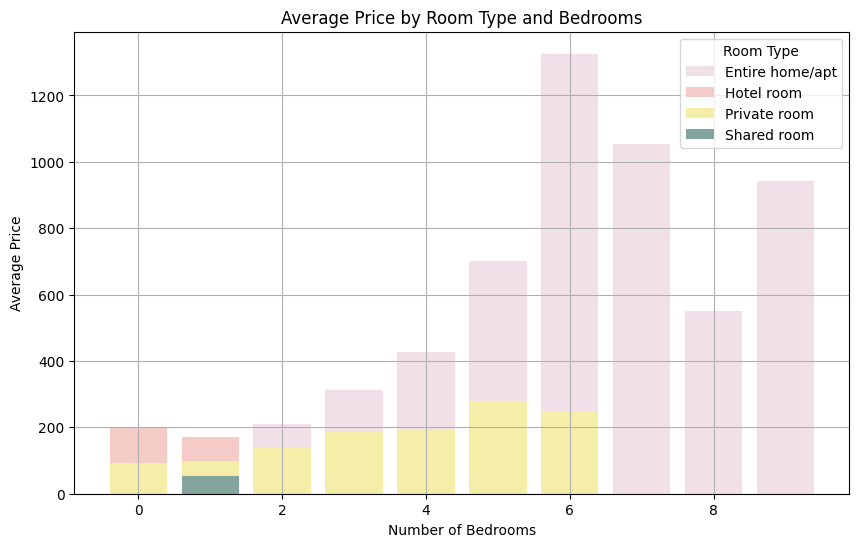

In [63]:
import matplotlib.pyplot as plt

# Group data by 'room_type' and 'bedrooms' and calculate the average price for each combination
average_price_by_room_type_and_bedrooms = listing_data.groupby(['room_type', 'bedrooms'])['price'].mean().reset_index()

# Plot
colors = iter(['#F2E0E8', '#F4CBC6', '#F4EEA9', '#84A59D'])

plt.figure(figsize=(10, 6))
for room_type in average_price_by_room_type_and_bedrooms['room_type'].unique():
    subset = average_price_by_room_type_and_bedrooms[average_price_by_room_type_and_bedrooms['room_type'] == room_type]
    plt.bar(subset['bedrooms'], subset['price'], label=room_type, color=next(colors))
plt.title('Average Price by Room Type and Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()


## Number of Bedrooms and Bathrooms vs. Price

<ipython-input-65-06ff6f4ebe8f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bedrooms['bathrooms_group'] = pd.cut(filtered_bedrooms['bathrooms'],


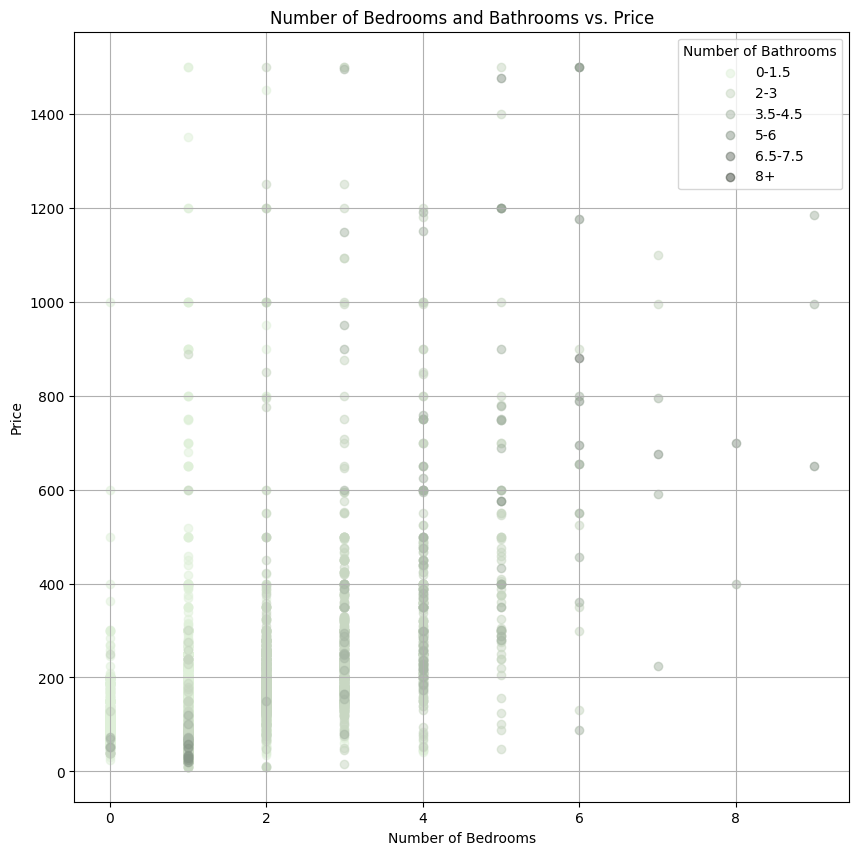

In [65]:
import matplotlib.pyplot as plt

# Filter data to limit price to a maximum of 1500 to get a better look at the majority of the data.
filtered_bedrooms = data[(data['price'] <= 1500)]

# Define 'bathrooms' bins
bathrooms_bins = [0, 1.5, 3, 4.5, 6, 7.5, 9]
bathrooms_labels = ['0-1.5', '2-3', '3.5-4.5', '5-6', '6.5-7.5', '8+']

# Group prices into bins
filtered_bedrooms['bathrooms_group'] = pd.cut(filtered_bedrooms['bathrooms'],
                                                 bins=bathrooms_bins,
                                                 labels=bathrooms_labels,
                                              include_lowest=True)

# Plot
colors = iter(['#DFF0D9', '#C8D7C2', '#A8B7A6', '#889788', '#687167', '#3F473C'])


plt.figure(figsize=(10, 10))
for bathrooms_group in bathrooms_labels:
    subset = filtered_bedrooms[filtered_bedrooms['bathrooms_group'] == bathrooms_group]
    plt.scatter(subset['bedrooms'], subset['price'], label=bathrooms_group,
                alpha=0.5, color=next(colors))

plt.title('Number of Bedrooms and Bathrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Number of Bathrooms')
plt.grid(True)
plt.show()



# Linear Regression

## Select Variables for Linear Regression Models

In [69]:
# Create subset of data with only columns to be used in the regression model
non_city_columns = ['accommodates', 'bathrooms', 'bedrooms', 'room_type_Entire home/apt', 'room_type_Hotel room',
         'room_type_Private room', 'room_type_Shared room', 'price']

selected_columns = [col for col in data.columns if col.startswith('city')] + non_city_columns
selected_data = data[selected_columns]

## Create Linear Regression Model


In [71]:
# Split the data into features (X) and target variable (y)
X = selected_data.drop(columns=['price'])
y = selected_data[['price']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 133569.80362065724


In [72]:
# Get the regression coefficients (weights) and corresponding variable names
coefficients = model.coef_[0]
variable_names = X.columns

# Print results
for variable, coefficient in zip(variable_names, coefficients):
    print(f"{variable}: {coefficient}")


city_Campbell: 23.973821350485863
city_Cupertino: 2.2526804855290123
city_Danville: 9.947598300641403e-14
city_Fremont: -9.558107867120013
city_Gilroy: -13.633890979864265
city_Hollister: 71.12232825946775
city_Los Altos: 66.90775770831064
city_Los Altos Hills: 154.29984850358318
city_Los Gatos: 138.3674972776447
city_Menlo Park: 99.41089569308996
city_Milpitas: -5.650364757939359
city_Monte Sereno: 42.729491609966466
city_Morgan Hill: 35.899972008845445
city_Mountain View: 100.54459451970307
city_Palo Alto: 87.09819753771882
city_San Jose: 8.233266292636118
city_San Martin: 68.52742106052294
city_Santa Clara: 18.331252411534606
city_Saratoga: 149.37280446002745
city_Stanford: 101.60382758738847
city_Sunnyvale: 13.061681958585257
city_Watsonville: 17.497619781075063
accommodates: 15.18466349316483
bathrooms: 62.27803553571966
bedrooms: 41.682283274256704
room_type_Entire home/apt: 21.477210613918224
room_type_Hotel room: 58.73430029007348
room_type_Private room: -1.964681518979594
room

In [74]:
# Create a DataFrame from the two lists
df_coefficients = pd.DataFrame({
    'coefficients': coefficients,
    'variable': variable_names
})

df_coefficients

,coefficients,variable
0,2.397382e+01,city_Campbell
1,2.252680e+00,city_Cupertino
2,9.947598e-14,city_Danville
3,-9.558108e+00,city_Fremont
4,-1.363389e+01,city_Gilroy
5,7.112233e+01,city_Hollister
6,6.690776e+01,city_Los Altos
7,1.542998e+02,city_Los Altos Hills
8,1.383675e+02,city_Los Gatos
9,9.941090e+01,city_Menlo Park
